In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, preprocessing
from sklearn.preprocessing import LabelEncoder


from matplotlib.colors import ListedColormap
from matplotlib.patches import Polygon
from matplotlib.patches import Patch


In [28]:
bounds = pd.read_csv('../data/bounds_prunned.csv') # Data for bounded region
original_data = pd.read_csv('../data/coordinates.csv') # Original data
# Extract source from run_id
original_data['Source'] = original_data['Row'].str.extract(r'_(\w+)$')
# Make source title case and remove underscores
original_data['Source'] = original_data['Source'].str.title().str.replace('_', ' ')

# Import new instances
new_instances = pd.read_csv('../data/final_evolved_instances_n_12.csv')

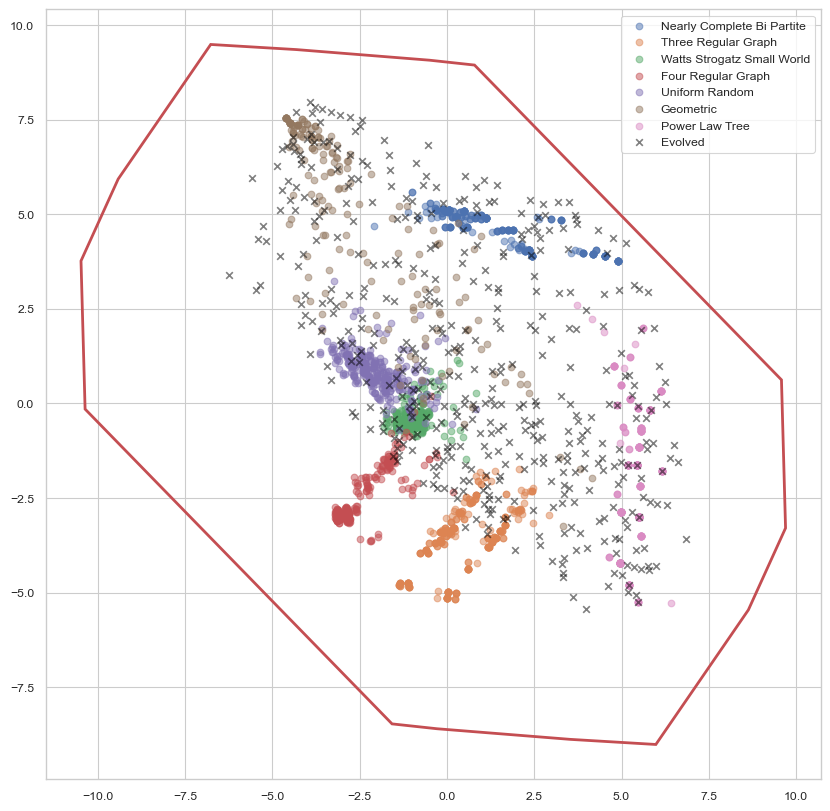

In [29]:
sns.set(style="whitegrid", context="paper")
plt.figure(figsize=(10, 10))
boundary_points = bounds[['z_1', 'z_2']].values
plt.gca().add_patch(Polygon(boundary_points, closed=True, fill=False, edgecolor='r', linewidth=2))
# Plot original instances and color by source
for source in original_data['Source'].unique():
    data = original_data[original_data['Source'] == source]
    plt.scatter(data['z_1'], data['z_2'], alpha=0.5, label=source)
plt.scatter(new_instances['z_1'], new_instances['z_2'], alpha=0.5, color='black', marker='x', label='Evolved') # New instances

# Add legend
plt.legend()

In [30]:
le = LabelEncoder()
original_data['Source'] = le.fit_transform(original_data['Source'])
original_data['Source'].unique()

array([2, 4, 6, 0, 5, 1, 3])

In [31]:
# Separate features and labels
X = original_data[['z_1', 'z_2']].values
y = original_data['Source'].values

In [45]:
# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=20, weights='distance')

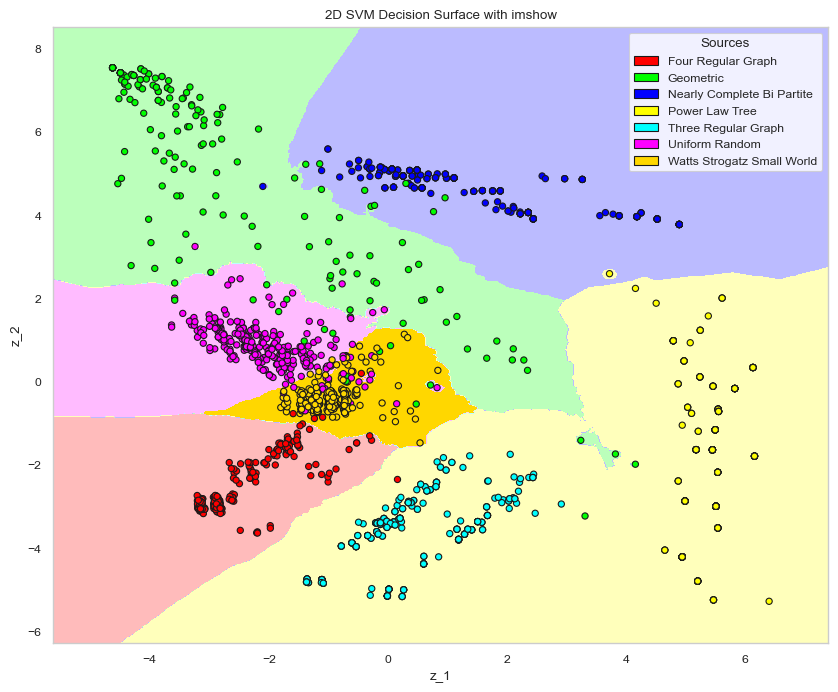

In [79]:
# Create a mesh to plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each mesh point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = ListedColormap([
    '#FFBBBB',  # Light red
    '#BBFFBB',  # Light green
    '#BBBBFF',  # Light blue
    '#FFFFBB',  # Light yellow
    '#BBFFFF',  # Light cyan
    '#FFBBFF',  # Light magenta
    '#FFD700'   # Gold
])

cmap_bold = [
    '#FF0000',  # Red
    '#00FF00',  # Green
    '#0000FF',  # Blue
    '#FFFF00',  # Yellow
    '#00FFFF',  # Cyan
    '#FF00FF',  # Magenta
    '#FFD700'   # Gold
]
# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
# Create legend handles manually
legend_handles = [Patch(facecolor=cmap_bold[i], edgecolor='k', label=label) 
                  for i, label in enumerate(le.classes_)]
plt.legend(handles=legend_handles, title="Sources")

# Set the limits and labels
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('z_1')
plt.ylabel('z_2')
plt.title("2D SVM Decision Surface with imshow")

plt.show()

In [91]:
# Train SVM
X = original_data[['z_1', 'z_2']].values
y = original_data['Source'].values
model = svm.SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X, y)


SVC(C=1, gamma='auto')

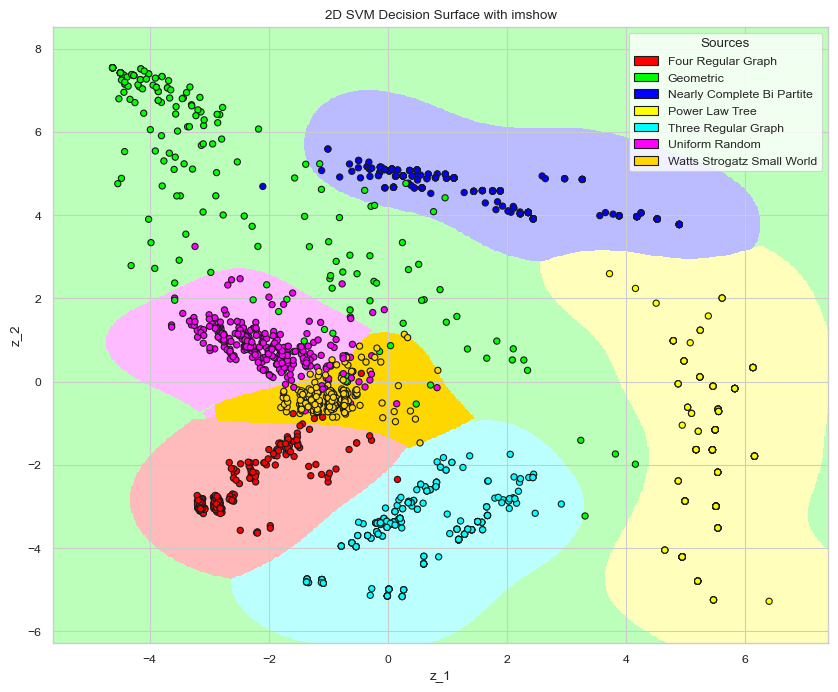

In [92]:
# Generate the meshgrid coordinates for plotting
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the result using imshow
plt.figure(figsize=(10, 8))
# Set the aspect to 'auto' to stretch the plot across the figure
# 'origin' is set to 'lower' to start the y-axis from the bottom of the plot
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap_light, aspect='auto', origin='lower')

# Plot the training points on top
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)

# Create legend handles manually
legend_handles = [Patch(facecolor=cmap_bold[i], edgecolor='k', label=label) 
                  for i, label in enumerate(le.classes_)]
plt.legend(handles=legend_handles, title="Sources")

# Set the limits and labels
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('z_1')
plt.ylabel('z_2')
plt.title("2D SVM Decision Surface with imshow")

plt.show()